In [7]:
import json
import matplotlib.pyplot as plt
RESULT_DIR = '../results'

import sys
sys.path.append('../src')

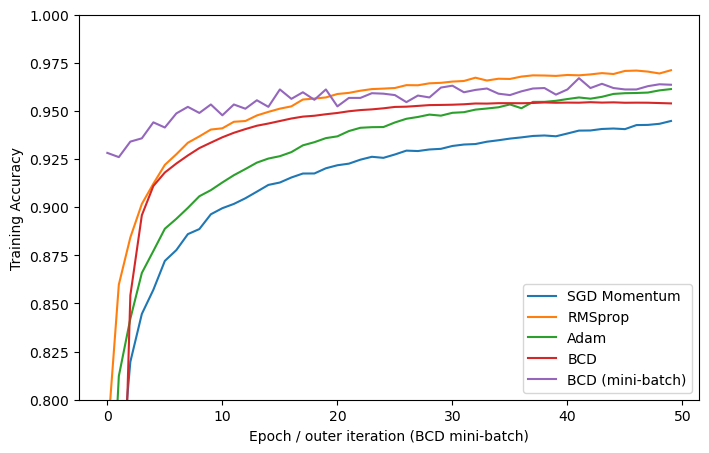

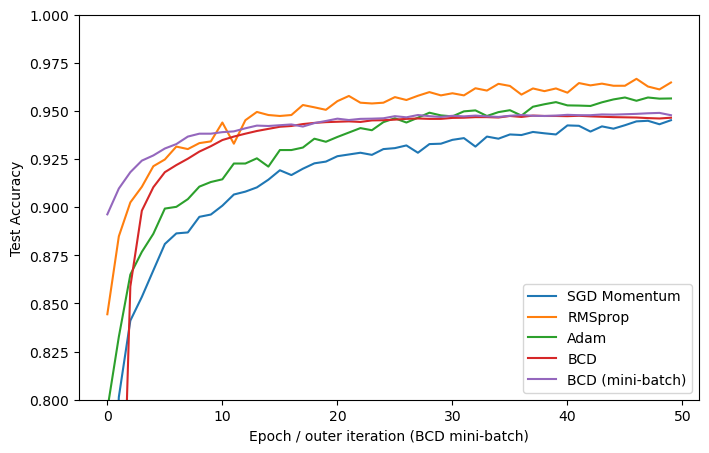

In [20]:
# Load results from json file

results_files = {
    'SGD Momentum': RESULT_DIR + '/momentum9_b64_h64.json',
    'RMSprop': RESULT_DIR + '/rmsprop_b64_h64_lr1e-3.json',
    'Adam': RESULT_DIR + '/adam_b64_h64_lr3e-4.json',
    'BCD': RESULT_DIR + '/bcd_fullbatch_d3_inner.json',
    'BCD (mini-batch)': RESULT_DIR + '/bcd_b4096_o50_i12_d3.json'
}

results_all = {}
for name, path in results_files.items():
    with open(path, 'r') as f:
        results_all[name] = json.load(f)

# Plot results training acc
plt.figure(figsize=(8, 5))
for name, results in results_all.items():
    plt.plot(results['acc_tr'], label=name)
plt.xlabel('Epoch / outer iteration (BCD mini-batch)')
plt.ylabel('Training Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()

# Plot results test acc
plt.figure(figsize=(8, 5))
for name, results in results_all.items():
    plt.plot(results['acc_te'], label=name)
plt.xlabel('Epoch / outer iteration (BCD mini-batch)')
plt.ylabel('Test Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()

plt.show()

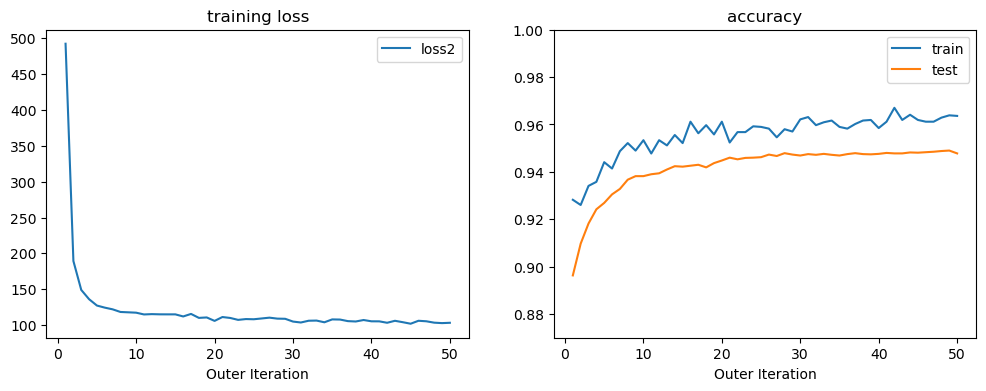

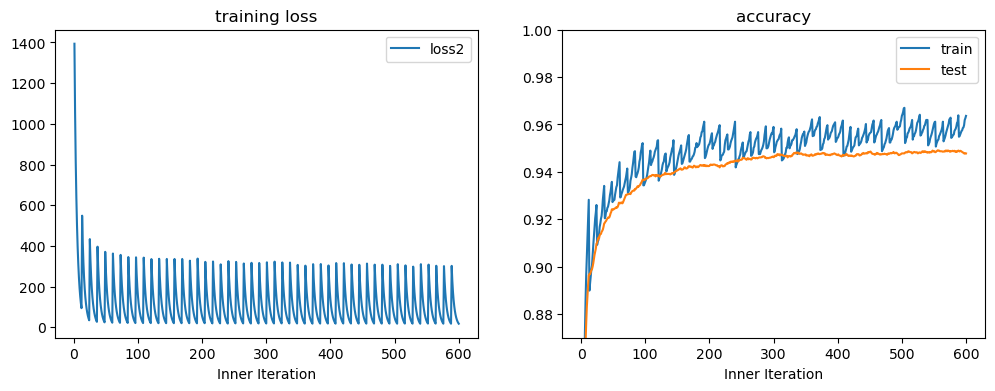

In [13]:
from utils import plot_results_bcd

# Load results from json file
outer_log_path = RESULT_DIR + '/bcd_b4096_o50_i12_d3.json'
inner_log_path = RESULT_DIR + '/bcd_b4096_o50_i12_d3_inner.json'
with open(outer_log_path, 'r') as f:
    outer_result = json.load(f)
with open(inner_log_path, 'r') as f:
    inner_result = json.load(f)

plot_results_bcd(outer_result, xlabel='Outer Iteration')
plt.ylim(0.87, 1.0)
plot_results_bcd(inner_result, xlabel='Inner Iteration')
plt.ylim(0.87, 1.0)
plt.show()

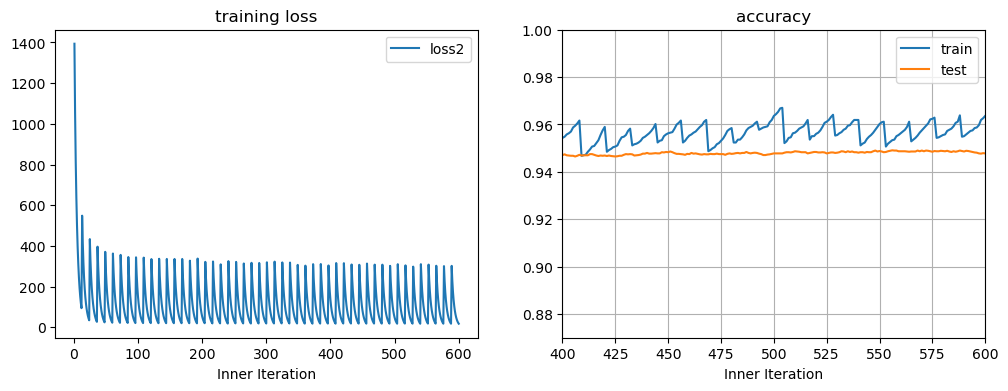

In [16]:
plot_results_bcd(inner_result, xlabel='Inner Iteration')
plt.xlim(400,600)
plt.ylim(0.87, 1.0)
plt.grid()
plt.show()